In [1]:
from arquivos import central
import matplotlib.pyplot as plt
from numba import njit
import numpy as np
import pandas as pd

In [2]:
robot = central.Central()
robot.get_normal_data_csv('C:\\Users\\johnk\\Google Drive\\My_Project\\Dados\\Data_D1_3k_icmarkets.csv', drop=True, drop_list=['Unnamed: 0'])

Dados Carregados com Sucesso.


In [3]:
robot.pct_data()

In [4]:
df = robot.get_normal_data()

In [25]:
eur = df[['EURUSD_Open','EURUSD_High','EURUSD_Low','EURUSD_Close']]
eur_open = df['EURUSD_Open']
eur_high = df['EURUSD_High'].shift()
eur_low = df['EURUSD_Low'].shift()
eur_close = df['EURUSD_Close'].shift(2)

In [53]:
at = pd.DataFrame()
at['at1'] = eur_high - eur_low
at['at2'] = abs(eur_high - eur_close)
at['at3'] = abs(eur_low - eur_close)
atr = pd.Series(at.values.max(1)).rolling(24).mean()

In [58]:
calc = eur_open + 2 * atr

In [76]:
x = (eur_open - calc)

In [82]:
a = atr.values

In [84]:
a.dtype = 'float32'

In [85]:
a.dtype

dtype('float32')

In [7]:
def normalize_values(series):
    """
    series = pandas_series
    """
    
    norm = (series - series.min()) / (series.max() - series.min())
    
    return norm

In [8]:
ibs_norm = normalize_values(ibs)

<AxesSubplot:>

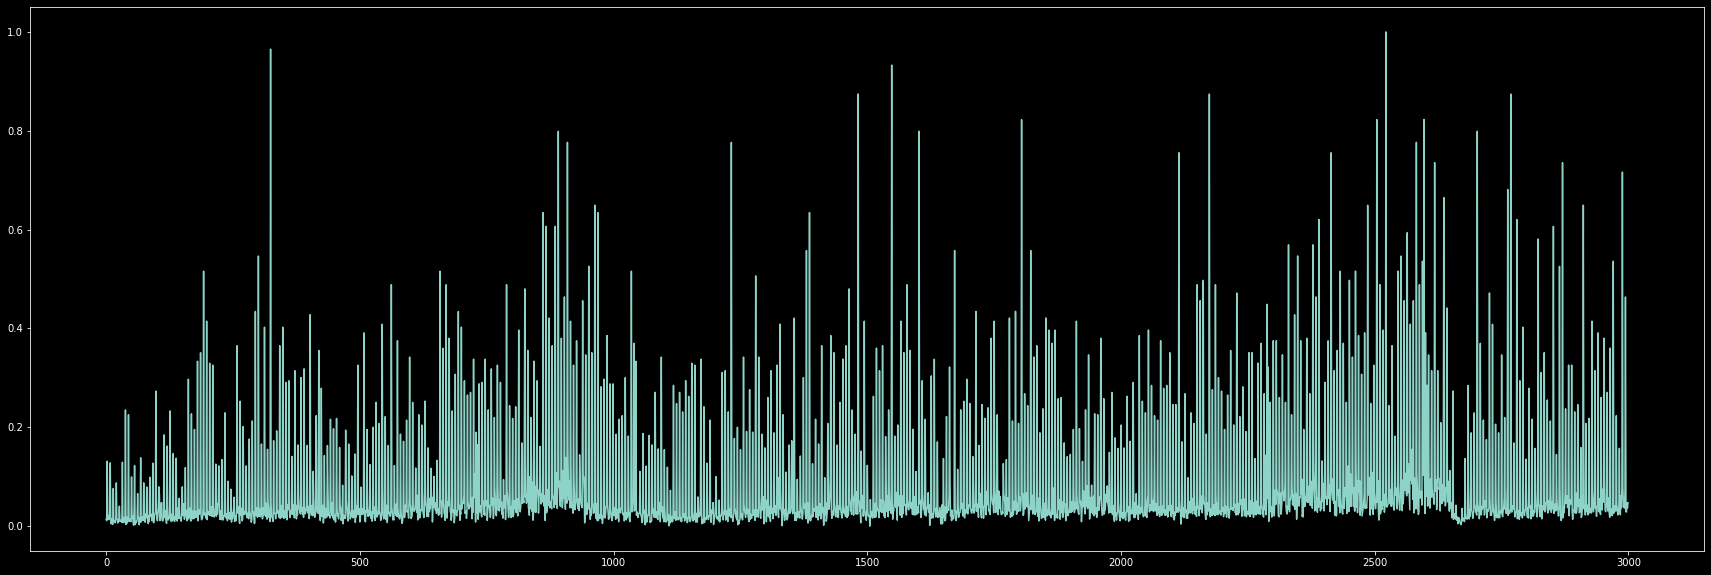

In [9]:
ibs_norm.plot()

In [38]:
ibs_norm_shift = ibs_norm.shift().fillna(0)

In [45]:
ibs_norm

0       0.013834
1       0.010996
2       0.131179
3       0.028649
4       0.013410
          ...   
2995    0.028916
2996    0.028422
2997    0.046667
2998    0.036935
2999    0.047359
Length: 3000, dtype: float64

In [39]:
ibs_norm_shift

0       0.000000
1       0.013834
2       0.010996
3       0.131179
4       0.028649
          ...   
2995    0.463671
2996    0.028916
2997    0.028422
2998    0.046667
2999    0.036935
Length: 3000, dtype: float64

In [48]:
ibs_norm.rolling(1).corr(ibs_norm_shift)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2995   NaN
2996   NaN
2997   NaN
2998   NaN
2999   NaN
Length: 3000, dtype: float64